Text(0.5, 0.98, "50% of Malaysia lives in the red areas\n\nRed areas = 3% of Malaysia's total area\n\nCharts: @thevesh on Twitter")

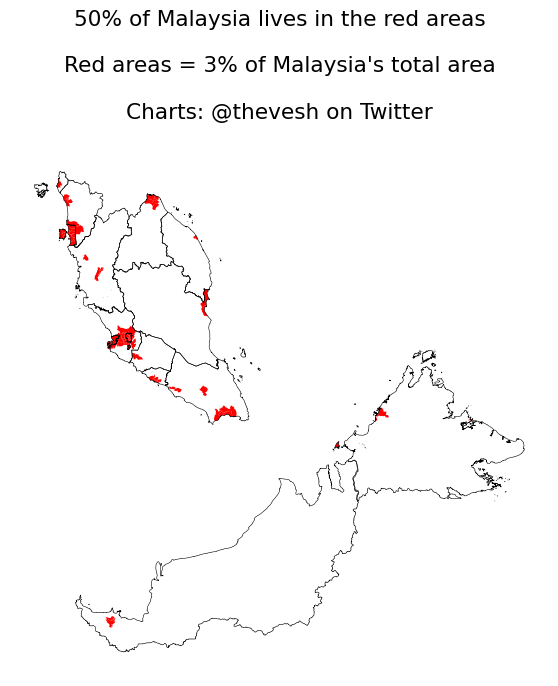

In [59]:
# 1) Using population density works well here because we know that dense Parlimens are smaller (domain knowledge)
# 2) If we didn't know (1), we could try sorting by area first (small --> large), then by population (large --> small)
# 3) If we did (2), note that this is not necessarily optimal. It is fast, but it ain't dynamic programming.

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

CHOOSE_PERC = 0.5

df = pd.read_csv('data/census_parlimen.csv',\
    usecols=['parlimen','population_total','area_km2'])\
        .sort_values(by=['area_km2','population_total'],ascending=[True,False])\
            .reset_index(drop=True)
# .sort_values(by=['population_total','area_km2'],ascending=[False,True])
df.columns = ['parlimen','area','population']
df['density'] = df.population/df.area 
df = df.sort_values(by='density',ascending=False)
TOTAL_AREA = df.area.sum()

df['perc'] = df.population/df.population.sum()
df['perc_cum'] = df.perc.cumsum()
df = df.iloc[:len(df[df.perc_cum <= CHOOSE_PERC])+1]
SELECTED_AREA = df.area.sum()/TOTAL_AREA

geo = gpd.read_file('maps/parlimen.geojson')
geo.loc[~geo.code_state.isin([12, 13, 15]), 'geometry'] = geo.geometry.translate(9, 4.5)
geo_s = geo.copy().dissolve(by='state')

geo['viable'] = np.nan
geo.loc[geo.parlimen.isin(df.parlimen.tolist()), 'viable'] = 1
assert geo.viable.sum() > CHOOSE_PERC, 'Insufficient population'

plt.rcParams.update({'font.size': 13,
                'font.family': 'sans-serif',
                'axes.facecolor': 'black',
                'figure.figsize': [7,7],
                'figure.autolayout': True})
fig, ax = plt.subplots()
fig.patch.set_facecolor('white')
ax.axis('off')

geo[geo.viable == 1].plot(edgecolor='none', linewidth=0.07, facecolor='red', ax=ax)
geo_s.plot(edgecolor='black', linewidth=0.4, facecolor='none', ax=ax)
str_pop = f'{CHOOSE_PERC*100:.0f}% of Malaysia lives in the red areas'
str_area = f'Red areas = {SELECTED_AREA*100:.0f}% of Malaysia\'s total area'
plt.suptitle(f'{str_pop}\n\n{str_area}\n\nCharts: @thevesh on Twitter', color='black')

Text(0.5, 0.98, "50% of Malaysia lives in the yellow areas\n\nYellow areas = 3% of Malaysia's total area\n\nCharts: @thevesh on Twitter")

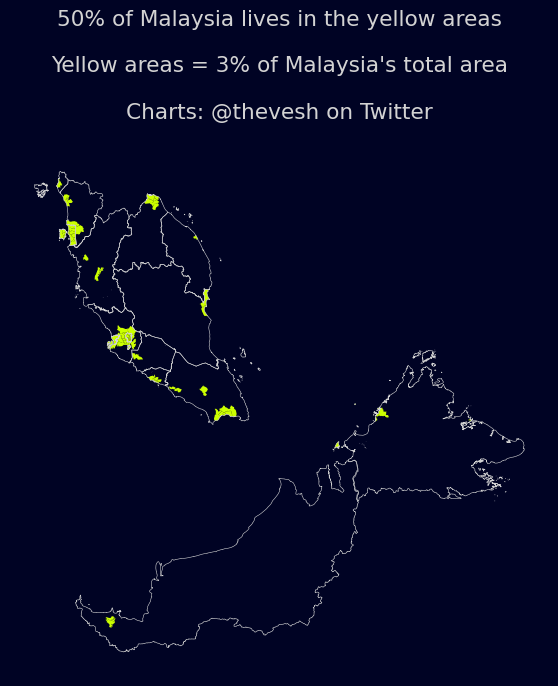

In [60]:
# same as above, but dark mode 

plt.rcParams.update({'font.size': 13,
                'font.family': 'sans-serif',
                'axes.facecolor': 'black',
                'figure.figsize': [7,7],
                'figure.autolayout': True})
fig, ax = plt.subplots()
fig.patch.set_facecolor('#000324')
ax.axis('off')

geo[geo.viable == 1].plot(edgecolor='none', linewidth=0.07, facecolor='#ccff00', ax=ax)
geo_s.plot(edgecolor='lightgrey', linewidth=0.4, facecolor='none', ax=ax)
str_pop = f'{CHOOSE_PERC*100:.0f}% of Malaysia lives in the yellow areas'
str_area = f'Yellow areas = {SELECTED_AREA*100:.0f}% of Malaysia\'s total area'
plt.suptitle(f'{str_pop}\n\n{str_area}\n\nCharts: @thevesh on Twitter', color='lightgrey')